<a href="https://colab.research.google.com/github/bclee232/DLwP/blob/master/3_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Single Label multiclass classification**

In [12]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data), len(test_data))
print(len(train_data[0]))
print("train data", train_data[0]) # encoded newswire
print("train label", train_labels[0]) # topic

8982 2246
87
train data [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
train label 3


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire) # offset of 3

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [10]:
# vectorisation (convert from lists to tensors)
# dim=10000 (10000 words from num_words)
import numpy as np

def vect_seq(seq, dim=10000):
  res = np.zeros((len(seq), dim))
  for i, s in enumerate(seq):
    res[i, s] = 1 # row i, col s
  return res

x_train = vect_seq(train_data)
x_test = vect_seq(test_data)

In [17]:
from keras.utils.np_utils import to_categorical # utils.np_utils vs utils?

y_train = vect_seq(train_labels, 46) # one-hot encoding
y_test = to_categorical(test_labels)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
# build model and compile
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [19]:
# validation - 9000 training so 1:8 = val:training
x_val = x_train[:1000]
y_val = y_train[:1000]

part_x_train = x_train[1000:]
part_y_train = y_train[1000:]

In [20]:
hist = model.fit(part_x_train, part_y_train, batch_size=512, epochs=20, validation_data=(x_val,y_val))
# overfit after 8? textbook says 9
# hard to see with numbers because diff. for loss and acc

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 159us/step - loss: 2.5396 - acc: 0.5588 - val_loss: 1.6872 - val_acc: 0.6630
Epoch 2/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.3690 - acc: 0.7192 - val_loss: 1.2729 - val_acc: 0.7350
Epoch 3/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.0244 - acc: 0.7838 - val_loss: 1.1183 - val_acc: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8165 - acc: 0.8250 - val_loss: 1.0597 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.6561 - acc: 0.8611 - val_loss: 0.9868 - val_acc: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.5267 - acc: 0.8895 - val_loss: 0.9566 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.4283 - acc: 0.9095 - val_loss: 0.9418 - val_acc: 0.8050


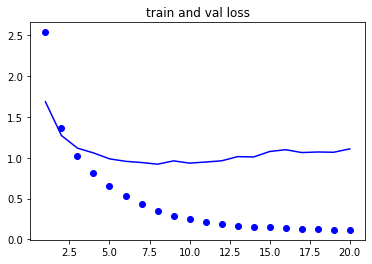

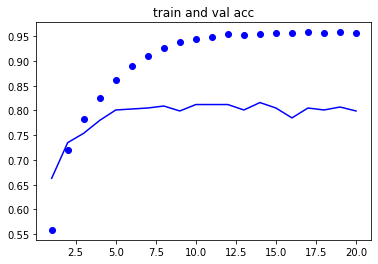

In [24]:
import matplotlib.pyplot as plt

hist_dict = hist.history
val_loss = hist_dict['val_loss']
loss = hist_dict['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='val train loss')
plt.title('train and val loss')
plt.show()
val_acc = hist_dict['val_acc']
acc = hist_dict['acc']
plt.plot(epochs, val_acc, 'b', label='train acc')
plt.plot(epochs, acc, 'bo', label='val train acc')
plt.title('train and val acc')
plt.show()

In [29]:
new_model = Sequential()
new_model.add(Dense(64, activation='relu', input_shape=(10000,)))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(46, activation='softmax'))

new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

new_model.fit(x_train, y_train, batch_size=512, epochs=9)

Epoch 1/9
8982/8982 [==============================] - 1s 117us/step - loss: 2.6495 - acc: 0.5286
Epoch 2/9
8982/8982 [==============================] - 1s 111us/step - loss: 1.3413 - acc: 0.7289
Epoch 3/9
8982/8982 [==============================] - 1s 113us/step - loss: 0.9836 - acc: 0.7937
Epoch 4/9
8982/8982 [==============================] - 1s 109us/step - loss: 0.7726 - acc: 0.8391
Epoch 5/9
8982/8982 [==============================] - 1s 109us/step - loss: 0.6110 - acc: 0.8735
Epoch 6/9
8982/8982 [==============================] - 1s 108us/step - loss: 0.4862 - acc: 0.9009
Epoch 7/9
8982/8982 [==============================] - 1s 109us/step - loss: 0.3954 - acc: 0.9173
Epoch 8/9
8982/8982 [==============================] - 1s 107us/step - loss: 0.3232 - acc: 0.9308
Epoch 9/9
8982/8982 [==============================] - 1s 109us/step - loss: 0.2706 - acc: 0.9403


In [30]:
res = model.evaluate(x_test, y_test)
res_new = new_model.evaluate(x_test, y_test)
print(res, res_new) # 9 was better in terms of acc

2246/2246 [==============================] - 0s 101us/step
[1.2573964667978397, 0.792965292930603] [0.9483689230038242, 0.800979495048523]


In [31]:
pred = new_model.predict(x_test)
print(np.argmax(pred[0])) # prediction value for first entry

3
